## Setup

Import modules

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import sweetviz as sv

Define constants and import dataset

In [226]:
DATASET = '../udataset/filtered_stock_and_etfs.csv'
START_DATE = '2010-01'
END_DATE = '2024-02'

df = pd.read_csv(DATASET)

## Exploratory Data Analysis

Generate Profile report for the dataset using `ydata-profiling` library

Generate a profile report using the `sweetviz` library

Plot time series data of coca cola stock

Plot time series data of S&P500 index

## Create metric for growth

Convert the date column to date type

In [227]:
df['Date-Time'] = pd.to_datetime(df['Date-Time'])
df['YearMonth'] = df['Date-Time'].dt.to_period('M')

Sort the dataframe by ticker symbol and date

In [228]:
df = df.sort_values(by=['Ticker_Symbol', 'Date-Time'])

Get the monthly opening price for each stock and the opening price the previous month

In [229]:
month_open_prices = df.groupby(['Ticker_Symbol', 'YearMonth'])['Open'].first().reset_index()

month_open_prices['Prev_First_Open'] = month_open_prices.groupby('Ticker_Symbol')['Open'].shift(1)

Calculate the monthly growth for each stock

In [230]:
month_open_prices['Monthly_Growth (%)'] = ((month_open_prices['Open'] - month_open_prices['Prev_First_Open']) / month_open_prices['Prev_First_Open']) * 100

Calculate the cumulative monthly growth for each stock

In [231]:
month_open_prices['Cumulative_Growth (%)'] = month_open_prices.groupby('Ticker_Symbol')['Monthly_Growth (%)'].cumsum()

Drop the first row of each stock

In [232]:
growth = month_open_prices.dropna(subset=['Prev_First_Open'])
#growth['YearMonth']-=1

growth.to_csv('../udataset/stock_growth_month.csv', index=False)

## Plot growth for each symbol

/tmp/ipykernel_173684/214737088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cdv/Datathon/.venv/lib/python3.10/site-pac

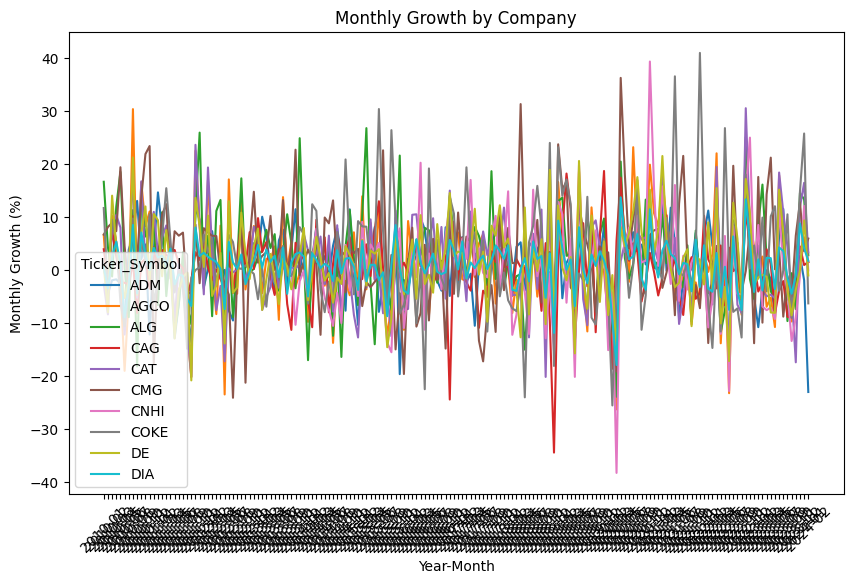

In [233]:
display_data = growth[growth['YearMonth'] >= pd.Period(START_DATE)]

display_data['YearMonth_str'] = display_data['YearMonth'].astype(str)

company_subset = display_data['Ticker_Symbol'].unique()[:10] # First 10 companies
plot_data = display_data[display_data['Ticker_Symbol'].isin(company_subset)]


plt.figure(figsize=(10, 6)) # TODO - Note that graph is not well labeled
sns.lineplot(data=plot_data, x='YearMonth_str', y='Monthly_Growth (%)', hue='Ticker_Symbol')
plt.xticks(rotation=45)
plt.title('Monthly Growth by Company')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Growth (%)')
plt.show()

In [234]:
MARKETCAP = '../udataset/market_cap.csv'
cap_df = pd.read_csv(MARKETCAP)
#cap_df = cap_df[cap_df['Ticker'] == 'COKE'] 
fast_food_tickers = ['WEN', 'YUM', 'MCD', 'CMG', 'DPZ']
fast_food_tickers = ['YUM']
cap_df = cap_df[cap_df['Ticker'].isin(fast_food_tickers)]
cap_df['YearMonth'] = pd.to_datetime(cap_df['YearMonth'])
cap_df['YearMonth'] = cap_df['YearMonth'].dt.to_period('M')


In [235]:
# growth = pd.merge()
print(cap_df.columns)
cap_df = cap_df.rename(columns = {'Ticker': 'Ticker_Symbol'})
growth = pd.merge(growth, cap_df, on = ['YearMonth', 'Ticker_Symbol'], how='left')

Index(['YearMonth', 'Ticker', 'MarketCap'], dtype='object')


In [236]:
growth = growth[growth['YearMonth'] >= pd.Period(START_DATE)]
growth
#growth['market_cap'] = growth.apply(get_market_cap, axis=1)


,Ticker_Symbol,YearMonth,Open,Prev_First_Open,Monthly_Growth (%),Cumulative_Growth (%),MarketCap
121,ADM,2010-01,31.48,31.250,0.736000,146.566170,NaN
122,ADM,2010-02,30.07,31.480,-4.479034,142.087136,NaN
123,ADM,2010-03,29.49,30.070,-1.928833,140.158303,NaN
124,ADM,2010-04,28.97,29.490,-1.763310,138.394994,NaN
125,ADM,2010-05,28.23,28.970,-2.554367,135.840627,NaN
...,...,...,...,...,...,...,...
7780,YUM,2023-10,124.53,129.925,-4.152396,243.938298,3.347400e+10
7781,YUM,2023-11,121.88,124.530,-2.128001,241.810297,3.540190e+10
7782,YUM,2023-12,125.59,121.880,3.043978,244.854274,3.569160e+10
7783,YUM,2024-01,129.73,125.590,3.296441,248.150715,3.597470e+10


In [237]:
growth['MarketCap_growth'] = growth['MarketCap']*growth['Monthly_Growth (%)']

In [238]:
growth[(growth['Ticker_Symbol'] == 'SPY') & (growth['YearMonth'] >= pd.Period(START_DATE)) & (growth['YearMonth'] <= pd.Period(END_DATE))]['Monthly_Growth (%)']


5999    1.307248
6000   -3.755451
6001    2.820157
6002    5.935252
6003    1.341256
          ...   
6164   -5.858729
6165   -1.739253
6166    8.723760
6167    3.596112
6168    2.641054
Name: Monthly_Growth (%), Length: 170, dtype: float64

In [239]:
overall_growth = []
year_month = []
start_year = int(START_DATE[:4])
end_year = int(END_DATE[:4])+1
for year in range(start_year, end_year):

    last_month = 13

    if year == end_year -1:
        last_month = int(END_DATE[-2:])+1



    for month in range(1, last_month):
        month_string = str(month)
        if len(month_string) == 1:
            month_string = '0' + month_string

        date_string = f'{str(year)}-{month_string}'
        year_month.append(date_string)

        overall_growth.append(growth[growth['YearMonth'] == pd.Period(date_string)]['MarketCap_growth'].sum()/growth[growth['YearMonth'] == pd.Period(date_string)]['MarketCap'].sum())

new_df = pd.DataFrame({'year-month': year_month, 'S&P_growth': growth[(growth['Ticker_Symbol'] == 'SPY') & (growth['YearMonth'] >= pd.Period(START_DATE)) & (growth['YearMonth'] <= pd.Period(END_DATE))]['Monthly_Growth (%)']})
new_df['processed_food_growth'] = overall_growth
new_df['growth_diff'] = (new_df['S&P_growth'] - new_df['processed_food_growth'])/(((new_df['processed_food_growth'])+new_df['S&P_growth'])/2)
new_df

,year-month,S&P_growth,processed_food_growth,growth_diff
5999,2010-01,1.307248,-1.265111,122.093835
6000,2010-02,-3.755451,-1.907745,0.652531
6001,2010-03,2.820157,-1.973875,11.329633
6002,2010-04,5.935252,13.947290,-0.805937
6003,2010-05,1.341256,10.784823,-1.557563
...,...,...,...,...
6164,2023-10,-5.858729,-4.152396,0.340887
6165,2023-11,-1.739253,-2.128001,-0.201046
6166,2023-12,8.723760,3.043978,0.965314
6167,2024-01,3.596112,3.296441,0.086955


In [240]:
UNEMPLOYMENTDATA = '../udataset/unemployment_by_state.csv'
unemployment_df = pd.read_csv(UNEMPLOYMENTDATA)
unemployment_df.columns = unemployment_df.columns.str.strip()
unemployment_df = unemployment_df.rename(columns={'YearMonth': 'year-month', 'unemploymentrate': 'unemployment-rate'})
unemployment_df.columns = unemployment_df.columns.str.lower()
unemployment_df = unemployment_df.rename(columns={'YearMonth': 'year-month', 'unemploymentrate': 'unemployment-rate'})
unemployment_df

,state,year-month,unemployment-rate
0,alabama,2010-01,11.7
1,alabama,2010-02,11.4
2,alabama,2010-03,11.0
3,alabama,2010-04,10.1
4,alabama,2010-05,9.9
...,...,...,...
8835,puerto rico,2023-10,5.5
8836,puerto rico,2023-11,5.7
8837,puerto rico,2023-12,5.8
8838,puerto rico,2024-01,5.8


In [241]:
#unemployment_rate = []
#for year in range(2010, 2023):
    #unemployment_rate.append(unemployment_df[unemployment_df['year'] == year]['estimate'].sum()/unemployment_df[unemployment_df['year'] == year]['labour_force_pop'].sum()*100)
    #unemployment_rate.append(unemployment_df[unemployment_df['year'] == year]['estimate'].sum())


In [242]:
#unemployment_rate = [9.63, 8.95, 8.07, 7.37, 6.17, 5.28, 4.87, 4.36, 3.90, 3.67, 8.05, 5.35, 3.61]
for state in unemployment_df['state'].unique():
    temp_df = unemployment_df[unemployment_df['state'] == state].copy()
    temp_df = temp_df.rename(columns={'unemployment-rate': f'{state}-unemployment-rate'})
    temp_df = temp_df.drop(columns=['state'])
    
    print(temp_df.columns)
    new_df = pd.merge(new_df, temp_df, on=['year-month'])


new_df
#print(new_df['unemployment_rate'].expanding().corr(new_df['S&P_growth']))

Index(['year-month', 'alabama-unemployment-rate'], dtype='object')
Index(['year-month', 'alaska-unemployment-rate'], dtype='object')
Index(['year-month', 'arizona-unemployment-rate'], dtype='object')
Index(['year-month', 'arkansas-unemployment-rate'], dtype='object')
Index(['year-month', 'california-unemployment-rate'], dtype='object')
Index(['year-month', 'colorado-unemployment-rate'], dtype='object')
Index(['year-month', 'connecticut-unemployment-rate'], dtype='object')
Index(['year-month', 'delaware-unemployment-rate'], dtype='object')
Index(['year-month', 'district of columbia-unemployment-rate'], dtype='object')
Index(['year-month', 'florida-unemployment-rate'], dtype='object')
Index(['year-month', 'georgia-unemployment-rate'], dtype='object')
Index(['year-month', 'hawaii-unemployment-rate'], dtype='object')
Index(['year-month', 'idaho-unemployment-rate'], dtype='object')
Index(['year-month', 'illinois-unemployment-rate'], dtype='object')
Index(['year-month', 'indiana-unemployment

Index(['year-month', 'massachusetts-unemployment-rate'], dtype='object')
Index(['year-month', 'michigan-unemployment-rate'], dtype='object')
Index(['year-month', 'minnesota-unemployment-rate'], dtype='object')
Index(['year-month', 'mississippi-unemployment-rate'], dtype='object')
Index(['year-month', 'missouri-unemployment-rate'], dtype='object')
Index(['year-month', 'pennsylvania-unemployment-rate'], dtype='object')
Index(['year-month', 'rhode island-unemployment-rate'], dtype='object')
Index(['year-month', 'south carolina-unemployment-rate'], dtype='object')
Index(['year-month', 'south dakota-unemployment-rate'], dtype='object')
Index(['year-month', 'tennessee-unemployment-rate'], dtype='object')
Index(['year-month', 'texas-unemployment-rate'], dtype='object')
Index(['year-month', 'utah-unemployment-rate'], dtype='object')
Index(['year-month', 'vermont-unemployment-rate'], dtype='object')
Index(['year-month', 'virginia-unemployment-rate'], dtype='object')
Index(['year-month', 'washin

,year-month,S&P_growth,processed_food_growth,growth_diff,alabama-unemployment-rate,alaska-unemployment-rate,arizona-unemployment-rate,arkansas-unemployment-rate,california-unemployment-rate,colorado-unemployment-rate,...,tennessee-unemployment-rate,texas-unemployment-rate,utah-unemployment-rate,vermont-unemployment-rate,virginia-unemployment-rate,washington-unemployment-rate,west virginia-unemployment-rate,wisconsin-unemployment-rate,wyoming-unemployment-rate,puerto rico-unemployment-rate
0,2010-01,1.307248,-1.265111,122.093835,11.7,9.3,10.9,8.8,13.1,9.5,...,11.1,8.6,8.3,7.4,8.1,10.2,9.8,10.1,8.7,16.0
1,2010-02,-3.755451,-1.907745,0.652531,11.4,9.6,10.6,8.7,13.0,9.5,...,10.8,8.4,8.5,7.2,8.1,10.1,10.4,10.4,8.3,16.1
2,2010-03,2.820157,-1.973875,11.329633,11.0,9.5,10.3,8.1,13.0,9.6,...,10.6,8.3,8.2,7.2,7.9,9.8,9.6,10.1,8.1,16.3
3,2010-04,5.935252,13.947290,-0.805937,10.1,8.5,10.1,7.4,12.3,9.1,...,9.7,7.9,7.9,6.8,7.2,8.9,8.5,8.8,7.4,17.2
4,2010-05,1.341256,10.784823,-1.557563,9.9,8.0,10.0,7.6,11.9,8.9,...,9.4,7.9,7.8,6.1,7.3,8.9,8.2,8.3,7.0,17.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2023-10,-5.858729,-4.152396,0.340887,2.6,4.2,4.2,3.1,5.0,3.2,...,3.4,3.7,2.6,1.6,3.0,4.2,3.7,2.8,2.4,5.5
166,2023-11,-1.739253,-2.128001,-0.201046,2.5,4.5,3.8,3.2,4.9,3.2,...,3.1,3.5,2.5,2.0,2.9,4.3,3.7,2.7,2.7,5.7
167,2023-12,8.723760,3.043978,0.965314,2.7,4.6,3.8,3.4,5.1,3.3,...,3.0,3.5,2.5,2.2,2.7,4.6,3.9,2.9,2.6,5.8
168,2024-01,3.596112,3.296441,0.086955,3.4,5.2,3.8,3.9,5.7,3.8,...,3.5,4.1,3.0,2.7,2.7,5.4,4.8,2.8,3.7,5.8


In [243]:
print(new_df[new_df.columns[1:]].corr())
#new_df['expanding_correlation'] = new_df['unemployment_rate'].expanding().corr(new_df['growth_diff'])

                                        S&P_growth  processed_food_growth  \
S&P_growth                                1.000000               0.581074   
processed_food_growth                     0.581074               1.000000   
growth_diff                               0.032903              -0.027107   
alabama-unemployment-rate                -0.023895               0.010689   
alaska-unemployment-rate                  0.075266               0.065559   
arizona-unemployment-rate                -0.005480               0.037004   
arkansas-unemployment-rate                0.010441               0.035024   
california-unemployment-rate              0.053022               0.077319   
colorado-unemployment-rate                0.061161               0.101148   
connecticut-unemployment-rate             0.090285               0.110382   
delaware-unemployment-rate                0.037858               0.064922   
district of columbia-unemployment-rate   -0.007609               0.022746   

In [244]:
new_df.to_csv('../udataset/growth_vs_unemployment_month.csv')